<a href="https://colab.research.google.com/github/alexandrgsv/stock_prediction_models/blob/main/S_P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyswarm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from pyswarm import pso

# Load data from CSV file
data = pd.read_csv('https://drive.google.com/uc?id=1_cAApPjzzk7Q-iFm-UrHG8gvn3AErRAH', header=0)

data.head()

,Date,Close
0,1950-01-03,16.66
1,1950-01-04,16.85
2,1950-01-05,16.93
3,1950-01-06,16.98
4,1950-01-09,17.08


In [3]:
# Convert date strings to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Sort data by date
data = data.sort_values('Date')

# Convert closing prices to a numpy array
values = data['Close'].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
values = values.reshape(-1,1)
values = scaler.fit_transform(values)



In [4]:
# Split data into training and testing sets
split_idx = int(0.95 * len(values))
train_data = values[:split_idx]
test_data = values[split_idx+1:]

test_X_labels = data['Date'].iloc[split_idx+1:-1]


In [5]:
display(test_X_labels)

16358   2015-01-07
16359   2015-01-08
16360   2015-01-09
16361   2015-01-12
16362   2015-01-13
           ...    
17212   2018-05-30
17213   2018-05-31
17214   2018-06-01
17215   2018-06-04
17216   2018-06-05
Name: Date, Length: 859, dtype: datetime64[ns]

In [6]:

# Reshape data for input to MLPRegressor
train_X = train_data[:-1].reshape(-1, 1)
train_y = train_data[1:].reshape(-1, 1)

test_X = test_data[:-1].reshape(-1, 1)
test_y = test_data[1:].reshape(-1, 1)

def constraint_function(x, ieqcons):
    return np.min(ieqcons(x))


# Define function to optimize
def objective_function(params, train_X, train_y):
    # Create ANN with specified parameters
    hidden_layer_sizes = (int(params[0]), int(params[1]))
    activation = 'relu' if params[2] < 0.5 else 'logistic'
    solver = 'adam' if params[3] < 0.5 else 'lbfgs'
    alpha = 10.0 ** -params[4]
    learning_rate_init = 10.0 ** -params[5]
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate_init=learning_rate_init)

    # Train ANN and evaluate performance
    model.fit(train_X, train_y.ravel())
    y_pred = model.predict(test_X)
    mse = np.mean((test_y - y_pred) ** 2)
    return mse

# Define optimization bounds and initial guess
lb = [1, 1, 0, 0, -5, -5]
ub = [10, 10, 1, 1, 0, 0]
x0 = np.array([5, 5, 0.5, 0.5, -2.5, -2.5])

def constraints(x, train_X, train_y):
  return x[0] - x[1], x[1] - x[2] 


# Optimize function using FIPSO
params, _ = pso(objective_function, lb, ub, ieqcons=[constraints], f_ieqcons=None, args=(train_X, train_y), swarmsize=40, maxiter=50, debug=True)


# Create final ANN with optimized parameters
hidden_layer_sizes = (int(params[0]), int(params[1]))
activation = 'relu' if params[2] < 0.5 else 'logistic'
solver = 'adam' if params[3] < 0.5 else 'lbfgs'
alpha = 10.0 ** -params[4]
learning_rate_init = 10.0 ** -params[5]
model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate_init=learning_rate_init)

# Train final ANN and predict closing prices intervals
model.fit(train_X, train_y)
y_pred = model.predict(test_X)


Converting ieqcons to a single constraint function


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

New best for swarm at iteration 1: [10.          2.74058229  1.          1.          0.         -0.83830563] 0.01412046753855836


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 1: [10.          2.74058229  1.          1.          0.         -0.83830563] 0.01412046753855836
New best for swarm at iteration 2: [ 4.40425233  1.07253883  0.08924988  1.         -1.0391489  -0.74646694] 0.013196672932878961


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 2: [ 4.40425233  1.07253883  0.08924988  1.         -1.0391489  -0.74646694] 0.013196672932878961


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 3: [ 4.40425233  1.07253883  0.08924988  1.         -1.0391489  -0.74646694] 0.013196672932878961
New best for swarm at iteration 4: [ 6.77715539  1.          0.40863853  1.         -0.21934508  0.        ] 0.012374159506179627
Best after iteration 4: [ 6.77715539  1.          0.40863853  1.         -0.21934508  0.        ] 0.012374159506179627
Best after iteration 5: [ 6.77715539  1.          0.40863853  1.         -0.21934508  0.        ] 0.012374159506179627
Best after iteration 6: [ 6.77715539  1.          0.40863853  1.         -0.21934508  0.        ] 0.012374159506179627
New best for swarm at iteration 7: [ 8.96480187  4.65248926  0.21189327  1.         -0.48556927 -0.54258724] 0.01104080946893042
Best after iteration 7: [ 8.96480187  4.65248926  0.21189327  1.         -0.48556927 -0.54258724] 0.01104080946893042
Best after iteration 8: [ 8.96480187  4.65248926  0.21189327  1.         -0.48556927 -0.54258724] 0.01104080946893042
Best after iteration 9: [ 8.9

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


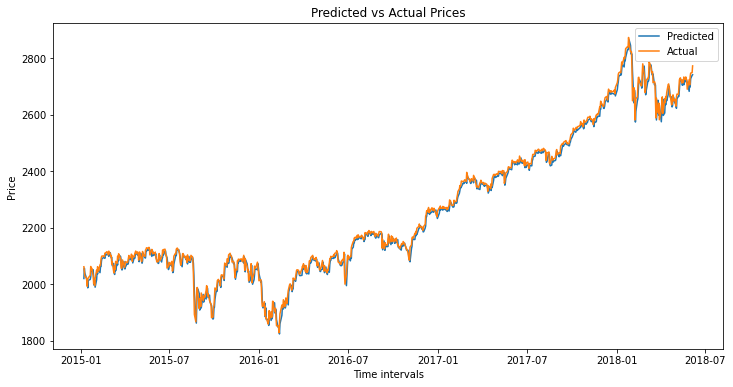

In [7]:
import matplotlib.pyplot as plt

# Train final ANN and predict closing prices intervals
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

# Visualize predicted vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(test_X_labels, scaler.inverse_transform(y_pred.reshape(-1,1)), label='Predicted')
plt.plot(test_X_labels, scaler.inverse_transform(test_y.reshape(-1,1)), label='Actual')
plt.xlabel('Time intervals')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()